In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BGR2RGB(x):
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x

In [3]:
def oneplt(x,title):
    plt.imshow(BGR2RGB(x)),plt.title(title)
    plt.axis("off")
    plt.show()

In [4]:
def pltimage(img,title,value):
    plt.figure(figsize=(10,8))
    for i in range(value):
        plt.subplot(2,2,i+1)
        plt.imshow(BGR2RGB(img[i]))
        plt.title(title[i])
        plt.axis('off')
    return plt.show() 


### Arithmetic Operations
Adding/subtracting the color intensity

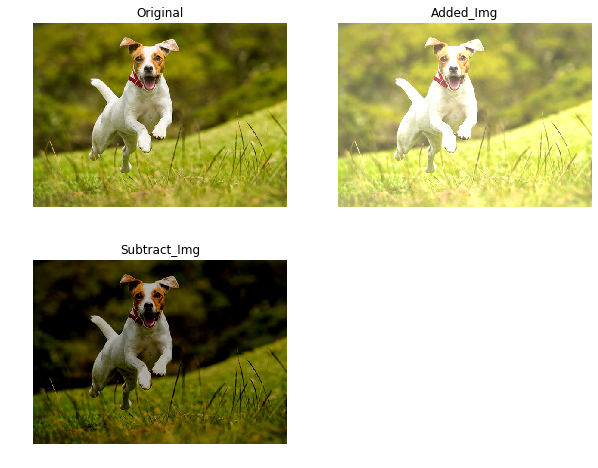

In [5]:
image = cv2.imread('Input/Image/dog.jpg')
# image = BGR2RGB(image)

Matrix = np.ones(image.shape,dtype='uint8')*75
added = cv2.add(image,Matrix)
sub = cv2.subtract(image,Matrix)

titles = ["Original","Added_Img","Subtract_Img"]
images = [image,added,sub]
pltimage(images,titles,3)

### Convolution and Blurring

**Convolution** : Convolution is a mathematical operation performed on two 
functions producing a third function which is typically a modified 
version of one of the original functions.
- output image = Image*Function(kernal size)

**Blurring** : In this operation we average the pixels within a region (Kernal)
- 3*3 kernal we multiply 1/9 to normalize (sum to 1)

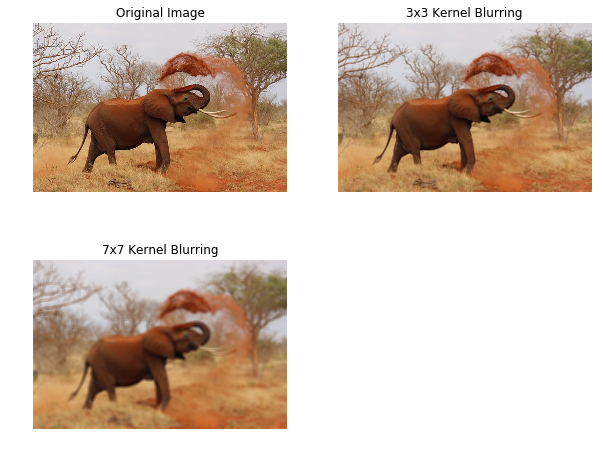

In [6]:
image = cv2.imread('Input/Image/elephant.jpg')

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)

titles = ['Original Image','3x3 Kernel Blurring','7x7 Kernel Blurring']
images = [image,blurred,blurred2]

pltimage(images,titles,3)


#### Other blurr techniques

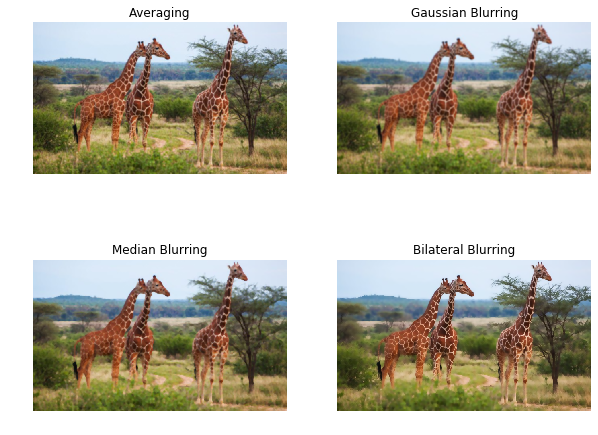

In [7]:
image = cv2.imread('Input/Image/giraffe.jpg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (3,3))

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (7,7), 0)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)

titles = ['Averaging','Gaussian Blurring','Median Blurring','Bilateral Blurring']
images = [blur,Gaussian,median,bilateral]

pltimage(images,titles,4)


### Image De-noising - Non-Local Means Denoising

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

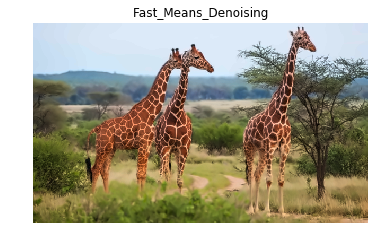

In [8]:
image = cv2.imread('Input/Image/giraffe.jpg')

# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
oneplt(dst,"Fast_Means_Denoising")

# cv2.imshow('Fast Means Denoising', dst)
# cv2.waitKey(0)

# cv2.destroyAllWindows()